In [ ]:
%reload_ext rpy2.ipython

In [ ]:
%%R
install.packages("tidyverse")
install.packages("janitor")
install.packages("ggthemes")
install.packages("highcharter")
install.packages("hrbrthemes")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_1.3.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 702779 bytes (686 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

# Loading in the data

In [ ]:
%%R
df <- read_csv("epldata_final.csv")

Rows: 461 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): name, club, position, fpl_sel, nationality
dbl (12): age, position_cat, market_value, page_views, fpl_value, fpl_points...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R
df <- df %>% mutate(position_cat= as.factor(position_cat),
                    region=as.factor(region),
                    club_id=as.numeric(as.factor(club)),
                    age_cat = as.factor(age_cat),
                    big_club=ifelse(club_id %in% c(1,5,10,11,12,17),1,0))

In [ ]:
%%R
ageCat <- function(age){
  if (age < 22)return(1)
  else if( age < 25)return(2)
  else if( age < 28)return(3)
  else if( age < 30)return(4)
  else if( age < 32)return(5)
  else return(6)
}

In [ ]:
%%R
df <- df %>%rowwise() %>% mutate(age_cat=ageCat(age))
df <- df %>% mutate(age_cat = as.factor(age_cat))

In [ ]:
%%R
df <- transform(df,age_category=cut(age,breaks=c(16,21,25,28,31,38),labels = c("17-21","22-25","26-28","29-31","32-38")))


In [ ]:
%%R
df1 <- filter(df,!club_id %in% c(3,8,13)) %>%
  filter(new_foreign == 0)

## Market Value distribution

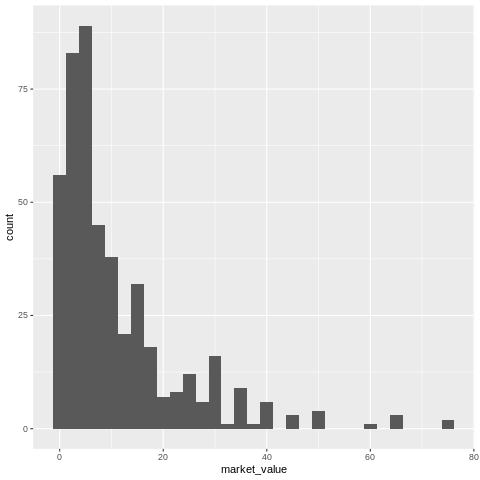

In [ ]:
%%R
ggplot(df,aes(market_value))+geom_histogram(binwidth = 2.5)

# Bigger clubs vs Smaller clubs


*   0 is smaller clubs
*   1 is bigger clubs




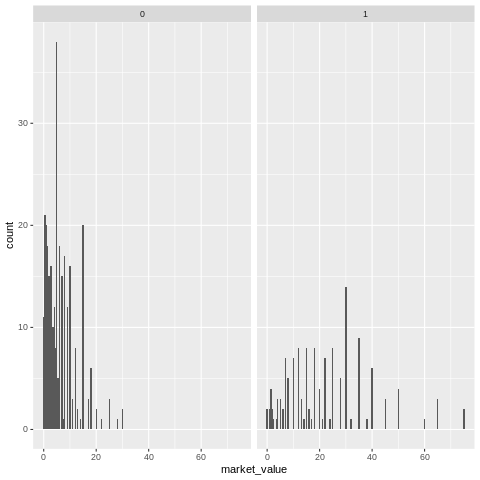

In [ ]:
%%R
ggplot(df,aes(market_value))+geom_histogram(binwidth = 0.5) + facet_wrap(~big_club)

# Market value compared to age

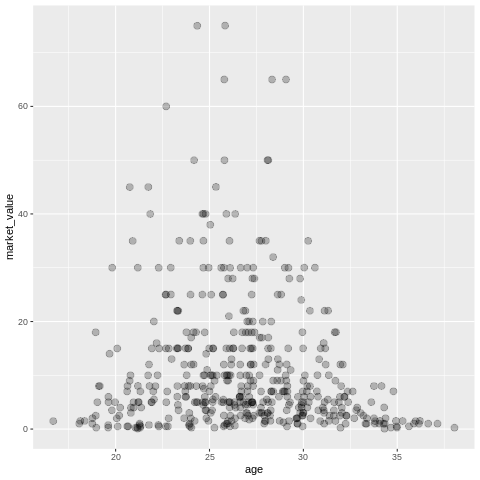

In [ ]:
%%R
df %>% ggplot(aes(age,market_value))+geom_jitter(alpha=0.25,size=3)

# Linear Regression model

In [ ]:
%%R
df1 <- df %>% 
  filter(!club_id %in% c(3,8,13)) %>%
  filter(new_foreign == 0) 
df1$page_views <- sqrt(df1$page_views)
model <- lm(sqrt(market_value) ~ page_views+age_category:position_cat+ page_views:region+page_views:big_club+new_signing:page_views, data=df1)

R Squared score

In [ ]:
%%R
print(summary(model)$r.squared)

[1] 0.7218166


# Predicted values to Actual values

In [ ]:
%%R
test <- df %>%
  filter(new_foreign==1)# %>%
  
test$page_views <- sqrt(test$page_views)
test$predicted_mv <- round(predict(model,test)^2,1)
temp <- test %>% select(name,market_value,predicted_mv)
temp

                  name market_value predicted_mv
1       Sead Kolasinac         15.0         12.5
2  Alexandre Lacazette         40.0         21.9
3      Antonio Rudiger         25.0         10.4
4     Tiemoue Bakayoko         16.0         17.5
5        Davy Klaassen         18.0          9.4
6       Sandro Ramirez         10.0          8.9
7       Vicente Iborra          9.0          4.3
8        Mohamed Salah         35.0         20.0
9       Ederson Moraes         22.0          9.2
10      Bernardo Silva         40.0         21.2
11     Victor Lindelof         22.0         16.4
12        Jan Bednarek          0.5          0.4
13          Roque Mesa         12.0          5.7
14        Kiko Femenia          4.0          5.2
15         Will Hughes          8.0          5.2
16        Ahmed Hegazy          1.0          5.1
